Let's go through what's necessary for the calculation of the thermal conductivity for any given time step during the TRT at specific locations:

In [4]:
%matplotlib inline

1. Read in the existing dataset: $T_s,T_r,Watts,t$, from the trt dataset
2. Find the gradient of temperature (whichever should be fine) to the natural log of hours, so your $m = \frac{dT}{d ln(t)}$
3. Using the gradient of the temperature, it is already possible to estimate the thermal conductivity, using $k_s = \frac{Q}{4\pi m}$
4. The thermal diffusivity can then be evaluated at $\alpha_s = \frac{k_s}{c_p}$,where the heat capacity is a known value: 37.5 in IP units
5. The borehole resistence may therefore be calculated as 
$R_b = \frac{1}{4\pi k_s}$ $(\frac{T_m - T_{rs}}{m}-ln\frac{4\alpha_s t}{r_b^2})$

The question then becomes... how do we evaluate the thermal conductivity at different depths of the well? It actually is pretty simple - we just need to use a few of the further simplifications that we've already seen.

If I remember correctly, the first thing we want to do is to slice the existing data to a dataframe that has all the information we want/need:
1. Find the time stamps we're looking for
2. Combine and convert the existing files into ones that has the following columns: annulus, grout, **CONSISTENT** time, and corresponding heat injection rates
_Note this will be problematic because we have four-minute-intervals while the other have five-minute ones... but nonetheless this is a key step to complete, and we can call quit today once this is achieved._
3. Calculate $R_{b,g}$
4. Calculate the corresponding $k_{s,i}$ using the equation on notebook

### Measurement Time
Start - Sep, 10th, 17:40:50 

End - Sep, 12th, 18:10:00

In [5]:
#Now let's try to process these folders/file data
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
import os
from glob import glob

In [7]:
ts = glob('pt0920/channel 1/2019/sep/*00001.ddf')

In [8]:
ts.sort()

In [9]:
ts[-1]>ts[0]

True

In [10]:
s1 = 'pt0920/channel 1/2019/sep/'
s2 = 'pt0920/channel 2/2019/sep/'
s3 = 'pt0920/channel 3/2019/sep/'
s4 = 'pt0920/channel 4/2019/sep/'
s0 = '*00001.ddf'
s = [s0,s1,s2,s3,s4]

In [11]:
import bisect
fl = []
for i in s[1:]:
    fi = glob(i+s0)
    fi.sort()
    ref1 = i + i[7:16] + ' 20190910 174000' + s0[1:]
    ref2 = i + i[7:16] + ' 20190912 181000' + s0[1:]
    fin = fi[bisect.bisect_right(fi,ref1):]
    fnn = fin[:bisect.bisect_left(fin,ref2)]
    fl.append(fnn)
    print (i+s0)

pt0920/channel 1/2019/sep/*00001.ddf
pt0920/channel 2/2019/sep/*00001.ddf
pt0920/channel 3/2019/sep/*00001.ddf
pt0920/channel 4/2019/sep/*00001.ddf


So, good news is we now have fl as the names of the files that we want to harvest, so we do have things in order. Now that's assemble the csvs together. 

Note that Channel 1, 3 are inner duplicates, 2,4 are outer duplicates.

In [12]:
for i in range(4):
    print (len(fl[i]))
    print (fl[i])
    
#We're working only C3 and C4 for now since they happen to ...! have consistent lengths.

715
['pt0920/channel 1/2019/sep/channel 1 20190910 174011 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 174411 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 174811 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 175211 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 175611 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 180011 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 180411 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 180811 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 181211 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 181611 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 182011 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 182411 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 182811 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 183211 00001.ddf', 'pt0920/channel 1/2019/sep/channel 1 20190910 183611 00001.ddf', 'pt0920/channel 1/20

In [13]:
import pickle
with open('ins','rb') as f:
    inss = pickle.load(f)
insf = ['%.3f' % elem for elem in inss]

In [14]:
f23 = fl[2]
all3 = pd.DataFrame()
for i in range(len(f23)):
    fram = pd.read_csv(f23[i],header=25,sep='\t',encoding= 'unicode_escape')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    DF = fram[fram['depth']>0]
    DF = DF.set_index('depth')
    DF = DF.transpose()
    s = DF.iloc[0].astype(float)
    s.name = str(f23[i])[-25:-25+8]+str(f23[i])[-25+9:-25+15]
#     print s
    all3 = all3.append(s)

In [15]:
f24 = fl[3]
all4 = pd.DataFrame()
for i in range(len(f24)):
    fram = pd.read_csv(f24[i],header=25,sep='\t',encoding= 'unicode_escape')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    DF = fram[fram['depth']>0]
    DF = DF.set_index('depth')
    DF = DF.transpose()
    s = DF.iloc[0].astype(float)
    s.name = str(f24[i])[-25:-25+8]+str(f24[i])[-25+9:-25+15]
#     print s
    all4 = all4.append(s)

In [16]:
all3.describe()

,0.556,1.571,2.586,3.600,4.615,5.629,6.644,7.659,8.673,9.688,...,413.496,414.511,415.526,416.540,417.555,418.569,419.584,420.599,421.613,422.628
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,34.178595,31.314465,27.825373,26.130101,24.631875,20.824929,10.591738,2.478055,1.298657,1.089520,...,25.939061,26.026118,26.030741,26.005806,25.946321,25.680781,25.619424,25.707633,124.672972,107.514729
std,5.232315,5.259066,5.102314,4.937556,4.642868,3.692393,2.359654,1.795329,1.782961,1.763852,...,3.103324,3.111285,3.111018,3.108597,3.102379,3.099326,3.100759,3.103864,28.160610,24.739205
min,26.679000,23.868000,20.558000,19.064000,18.042000,15.589000,7.399000,0.676000,-0.290000,-0.449000,...,18.426000,18.397000,18.213000,18.340000,18.194000,17.978000,18.067000,18.192000,82.851000,70.174000
25%,29.683000,26.714500,23.193000,21.574750,20.455500,17.622750,8.586000,1.117500,-0.047500,-0.225000,...,23.638500,23.769750,23.751750,23.706500,23.628750,23.368000,23.328000,23.396250,101.249500,87.175750
50%,33.662000,30.857000,27.599500,25.912000,24.488500,20.750000,10.898500,2.756500,1.400000,1.141000,...,26.453000,26.532000,26.558500,26.496000,26.428500,26.235000,26.129500,26.238000,110.792000,95.556500
75%,38.365250,35.400500,31.402750,29.519750,27.698000,22.954000,11.686000,3.295250,2.218500,1.959500,...,28.109000,28.205500,28.199250,28.168750,28.117250,27.847000,27.798250,27.878750,156.770000,135.513250
max,55.454000,52.672000,49.517000,47.790000,45.919000,41.231000,29.868000,21.246000,20.091000,19.909000,...,48.443000,48.457000,48.570000,48.565000,48.470000,48.109000,48.021000,48.239000,206.913000,181.287000


In [17]:
all4.describe()

,0.556,1.571,2.586,3.600,4.615,5.629,6.644,7.659,8.673,9.688,...,413.496,414.511,415.526,416.540,417.555,418.569,419.584,420.599,421.613,422.628
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,...,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,34.117750,29.991329,25.992732,24.904197,24.277463,18.326890,7.363437,1.655615,1.181797,1.125069,...,27.443333,27.441618,27.465220,27.462609,27.463016,27.461728,27.470784,27.495887,108.324543,107.038588
std,5.228377,5.178482,4.948807,4.771881,4.441682,3.346299,2.042650,1.708030,1.705572,1.706280,...,3.118467,3.122902,3.118113,3.116252,3.122480,3.121426,3.117546,3.122312,25.990536,24.396063
min,26.618000,22.554000,18.820000,17.920000,17.773000,13.607000,4.764000,0.056000,-0.353000,-0.421000,...,19.613000,19.578000,19.623000,19.644000,19.681000,19.653000,19.651000,19.613000,68.948000,69.651000
25%,29.636000,25.417000,21.548000,20.509000,20.252500,15.500500,5.737500,0.299500,-0.176000,-0.222500,...,25.150000,25.192500,25.180000,25.166500,25.145500,25.182000,25.193500,25.201000,87.960000,88.121000
50%,33.609000,29.664000,25.854000,24.781000,24.129000,18.370000,7.843000,1.924000,1.282000,1.189000,...,28.022000,27.993000,28.021000,28.019000,27.997000,27.992000,28.002000,27.993000,95.310000,94.827000
75%,38.171000,33.929000,29.561500,28.272500,27.244000,20.345000,8.452500,2.514500,2.047000,2.006000,...,29.625000,29.613000,29.629000,29.656000,29.638000,29.658000,29.668500,29.682500,137.908000,134.519500
max,55.493000,51.268000,47.035000,45.844000,44.901000,37.968000,26.122000,20.389000,20.007000,19.861000,...,49.986000,50.054000,49.991000,50.030000,49.975000,50.049000,49.965000,50.104000,183.834000,180.355000


In [18]:
all3['DT'] = pd.to_datetime(all3.index.values)
all4['DT'] = pd.to_datetime(all4.index.values)

In [19]:
all3 = all3.set_index('DT')
all4 = all4.set_index('DT')

In [20]:
all3.index[0]

Timestamp('2019-09-10 17:42:10')

In [21]:
#This was done manually to calculate the differences in hours
begin = pd.to_datetime('20190910174000')
end = pd.to_datetime('20190912181000')

In [22]:
import numpy as np
all3['hrs'] = all3.index - begin
all3['hrs'] = all3['hrs']/np.timedelta64(1,'h')
all4['hrs'] = all4.index - begin
all4['hrs'] = all4['hrs']/np.timedelta64(1,'h')

How about we try to just estimate the heat injection rate using the iterative approach here so that we get the heat injection rate at any given point? Should be possible.

In [23]:
xls = pd.read_excel('gtri_raw.xlsx',index_col=0,skiprows=3)
xls = xls.rename(columns={xls.columns[-1]:'HeatIn'})
gtri = xls[['Supply1','Return1','HeatIn','(hr)']].copy()
yinterp = np.interp(gtri['(hr)'],gtri['(hr)'],gtri['HeatIn'])

In [24]:
np.interp(10,gtri['(hr)'],gtri['HeatIn'])

78.13022400461705

In [25]:
#Remember Hin here is already Q over L!!!
all3['Hin'] = np.interp(all3['hrs'],gtri['(hr)'],gtri['HeatIn'])
all4['Hin'] = np.interp(all4['hrs'],gtri['(hr)'],gtri['HeatIn'])

In [26]:
#Let's operate and get a new all4 that has a displaced distance set: 
reali = all4.columns[:-2].values.astype(float)-1.5
alt4 = all4.copy()
for k in all4.index:
    yinterp = np.interp(all4.columns[:-2].values.astype(float),all4.loc[k][:-2],reali)
    alt4.loc[k][:-2] = yinterp

In [27]:
temps = all4.iloc[200][:-4].values 
index = all4.iloc[200][:-4].index.values.astype(float)

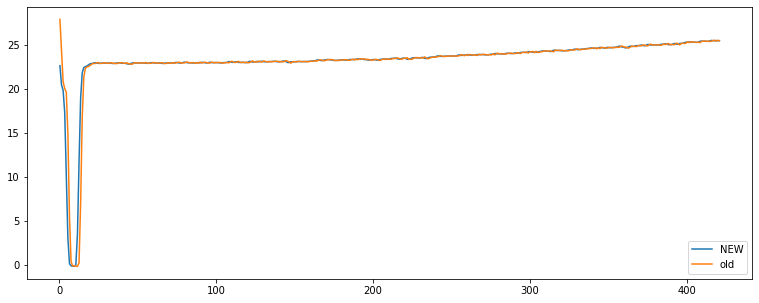

In [28]:
fig = plt.figure(figsize=(13,5))
plt.plot(index,np.interp(index,index-1.5,temps),label='NEW')
plt.plot(index,temps,label = 'old')
plt.legend()

In [29]:
def c15(ps):
    filt = ps
    temps= filt.values
    index= filt.index.values.astype(float)
    in5 = index - 1.5
    nt = np.interp(index,in5,temps)
    return nt

In [30]:
can = all4[all4.columns[:-2]].iloc[:5]
for i in can.index:
#     print can.loc[i]
    can.loc[i] = c15(can.loc[i])

<AxesSubplot:>

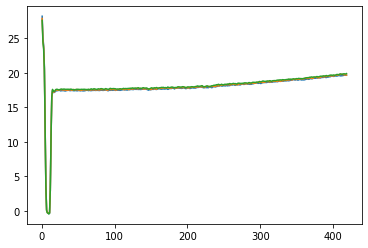

In [31]:
can.iloc[0][:-4].plot()
can.iloc[1][:-4].plot()
can.iloc[2][:-4].plot()

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='DT'>

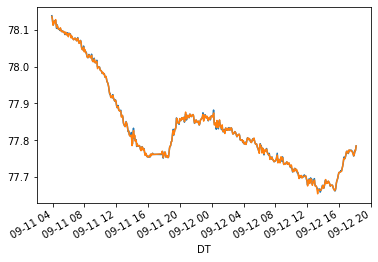

In [32]:
all3.Hin.plot()
all4.Hin.plot()

In [33]:
#Try to remove outlier
all3 = all3[all3[all3.columns[4]] <40]

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecate

<AxesSubplot:xlabel='DT'>

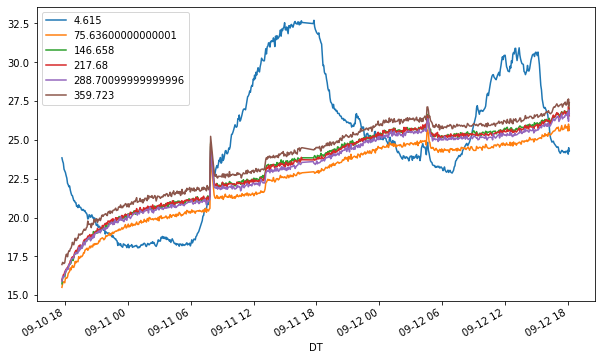

In [34]:
all3[all3.columns[4::70]].plot(figsize=(10,6))

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecate

<AxesSubplot:xlabel='DT'>

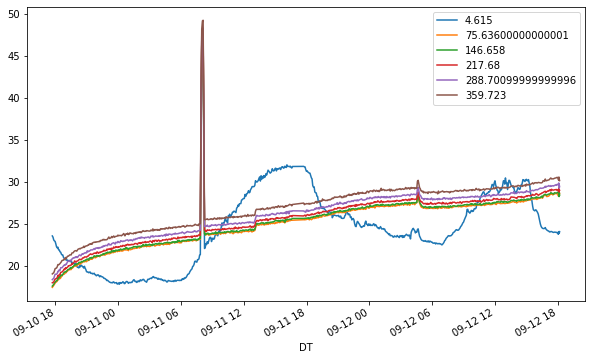

In [35]:
all4[all4.columns[4::70]].plot(figsize=(10,6))

In [36]:
import matplotlib.pyplot as plt

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


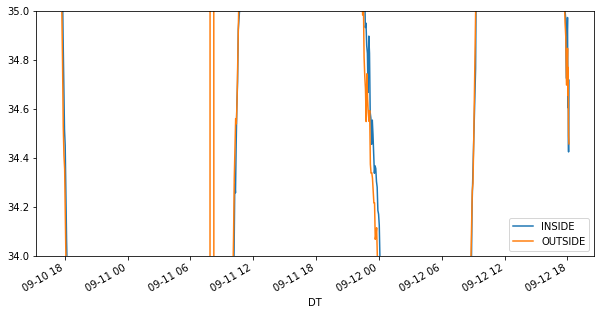

In [37]:
all3[all3.columns[0]].plot(figsize=(10,5),label='INSIDE')
all4[all4.columns[0]].plot(label='OUTSIDE')
plt.ylim(34,35)
plt.legend()

In [38]:
all3.to_csv('C3proc.csv')
all4.to_csv('C4proc.csv')

In [39]:
all3 = pd.read_csv('C3proc.csv',index_col=0)
all4 = pd.read_csv('C4proc.csv',index_col=0)

In [40]:
AL = all3[all3['hrs']>14]

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='DT'>

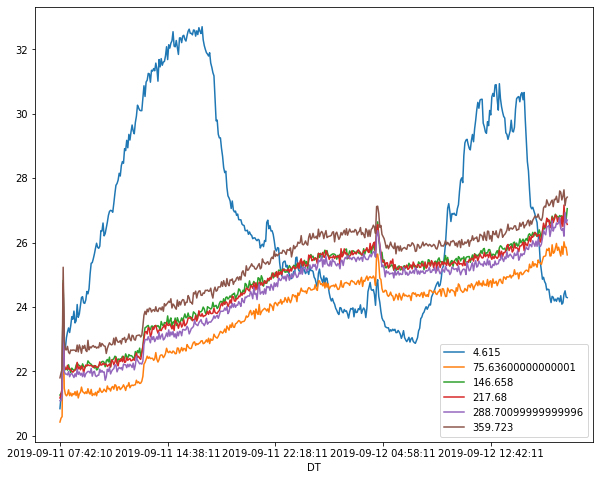

In [41]:
AL[AL.columns[4::70]].plot(figsize=(10,8))

In [42]:
all3.columns[5::60]

Index(['5.629', '66.505', '127.381', '188.25599999999997', '249.132',
       '310.008', '370.88300000000004'],
      dtype='object')

In [43]:
all3.hrs.head(5)

DT
2019-09-10 17:42:10    0.036111
2019-09-10 17:46:11    0.103056
2019-09-10 17:50:11    0.169722
2019-09-10 17:54:11    0.236389
2019-09-10 17:58:11    0.303056
Name: hrs, dtype: float64

In [44]:
all4.hrs.head(5)

DT
2019-09-10 17:43:11    0.053056
2019-09-10 17:47:11    0.119722
2019-09-10 17:51:11    0.186389
2019-09-10 17:55:11    0.253056
2019-09-10 17:59:11    0.319722
Name: hrs, dtype: float64

Let's switch gear a little bit - to avoid the iteration problem, don't try to hard with the time steps since they simply aren't consistent. Let's try to only use the hours beyond 10 and get the mean values of all3 and all4, and then we can do the calculation easy.

In [45]:
al3_10=all3[all3['hrs']>10]
al4_10=all4[all4['hrs']>10]

In [46]:
al3a = al3_10.mean()
al4a = al4_10.mean()

In [47]:
al3_10.describe()

,0.556,1.571,2.5860000000000003,3.6,4.615,5.629,6.644,7.659,8.673,9.687999999999999,...,415.526,416.54,417.555,418.569,419.584,420.599,421.61300000000006,422.62800000000004,hrs,Hin
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,529.000000
mean,35.529820,32.729242,29.263821,27.553252,25.961553,21.839417,11.155923,2.782534,1.569558,1.345789,...,26.986568,26.956840,26.896453,26.633226,26.572910,26.658966,114.895801,99.008895,28.877921,77.841009
std,4.554787,4.528827,4.286747,4.080359,3.806924,2.909424,1.533890,0.924314,0.946393,0.921982,...,1.734333,1.729839,1.729447,1.729293,1.721374,1.728659,24.041966,21.244364,11.085419,0.121268
min,26.858000,23.982000,20.743000,19.248000,18.154000,16.048000,8.004000,0.938000,-0.245000,-0.362000,...,23.418000,23.368000,23.351000,23.022000,23.033000,23.076000,82.851000,70.174000,10.036111,77.659232
25%,32.629750,29.839750,26.745250,25.304750,23.897750,20.244250,10.125250,1.954500,0.498750,0.274000,...,25.251500,25.233000,25.193000,24.922500,24.839750,24.965000,96.615500,83.090750,19.153056,77.759186
50%,35.007500,32.024000,28.623000,26.880000,25.400000,21.645500,11.297500,2.968500,1.823000,1.634000,...,27.827000,27.760500,27.760500,27.473000,27.360000,27.484500,108.859000,93.775000,29.003056,77.816027
75%,39.893500,37.068750,33.134000,31.209000,29.218000,24.129250,12.253250,3.383750,2.294000,2.063500,...,28.336250,28.272250,28.231750,27.969000,27.904500,27.990250,113.058500,97.402250,37.852986,77.869743
max,43.426000,40.797000,36.975000,34.957000,32.705000,27.166000,13.911000,5.714000,4.093000,3.876000,...,29.788000,29.724000,29.875000,29.586000,29.365000,29.429000,161.810000,140.644000,48.484444,78.138135


In [48]:
vT = (al4a-al3a).iloc[:-6]

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

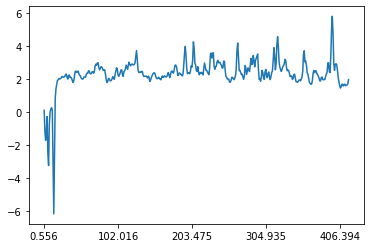

In [49]:
vT.plot()

So we have the temperature differencial here... Or so I think. The only problem now is how to advance this into the thermal conductivity. I believe we have a rough idea. This involves using the following relationship:


$$4\pi\sum^N_{i=1} k_{s,i}m_i l_i = \sum^N_{i=1}q_i = \sum^N_{i=1}\frac{\delta T_i}{R_i} = \frac{\sum^N_{i=1}(T_{an,i}-T_{b,i})}{R_g+R_{conv}+R_{cond}} = Q$$ 

This shoud apply to any given time step.

Now here are some known parameters: 

$k_g = 2.77 W/m\cdot K$

$k_{ep} = 22.5 W/m\cdot K$

$d_{eo} = 0.1651 m = 2r_b$

$Len = 408.43 m$

$R_g = \frac{ln(\frac{d_{eo}+ 0.004)}{d_{eo}})}{2\pi k_g}$ + $\frac{ln(\frac{d_{eo})}{d_{ei}})}{2\pi k_{ep}}$ + $\frac{1}{\pi d_{ei}h_{po}}$

_If necessary: This could also be calculated for any flow rate_

We now mostly just want to convert testv.py to something that we can easily get the hpo and Rg out of using any given deo, dei, Len and flow rates. This should be easy. The next step would therefore be casually converting the strin series with their index values (depths) into what we already know to be correct... 

It's important to stress this again: **$m$ is the gradient of temperature over natural log of time in hours**.

In [50]:
import numpy as np

In [51]:
def mfdf10(df):
#     df = df[df['hrs']>10]
#     all3[all3['hrs']>10]
    tar = df.set_index('hrs')
    tcol= tar.columns[:-1]
    dt = pd.DataFrame(columns = tcol)
    for i in tcol:
        dt[i]= np.gradient(tar.iloc[:-1][i],np.log(tar.iloc[:-1].index.values.astype(float)))
    return dt
def mmf(df):
    mdf = mfdf10(df)
    return mdf.mean()

In [52]:
msms = mfdf10(all3)

In [53]:
def gtG(df):
    DF = pd.DataFrame()
    for i in df.columns:
        DF[i]= np.gradient(df[i],np.log(df.index.values.astype(float)))
    return DF

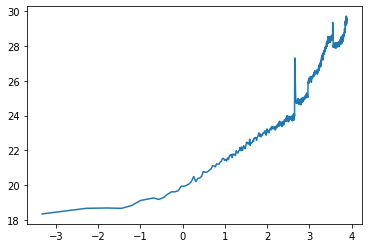

In [54]:
plt.plot(np.log(all3.hrs),all3[all3.columns[410]])

In [55]:
gt = all3[all3.columns[410]]

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='DT'>

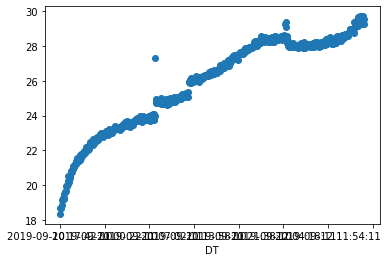

In [56]:
gt[gt<45].plot(marker = 'o',linestyle='')

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
linear_re = LinearRegression()
X = np.log(all3.hrs).values.reshape(-1,1)
Y = all3[all3.columns[410]].values.reshape(-1,1)
linear_re.fit(X,Y)
Y_pred = linear_re.predict(X)

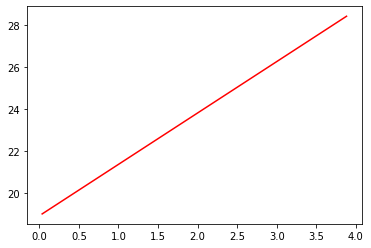

In [59]:
# plt.scatter(X,Y)
plt.plot(X[X>0].reshape(-1,1),linear_re.predict(X[X>0].reshape(-1,1)),color='red')

In [60]:
(linear_re.predict(X[X>0].reshape(-1,1))[-1]- linear_re.predict(X[X>0].reshape(-1,1))[0])/(X[X>0][-1]-X[X>0][0])

array([2.44580288])

In [61]:
linear_re.coef_

array([[2.44580288]])

In [62]:
def getMMS(df):
    sr = np.array([])
    X = np.log(df.hrs.values).reshape(-1,1)
    for i in range(len(df.columns)-3):
        lnr = LinearRegression()
#         X = np.log(all3.hrs).values.reshape(-1,1)
        Y = df[df.columns[i]].values.reshape(-1,1)
        lnr.fit(X,Y)
#         try:
#             print lnr.coef_
#         except:
#             continue
        sr = np.append(sr,lnr.coef_[0][0])
    return sr

In [63]:
all4=all4[all4.hrs>10]

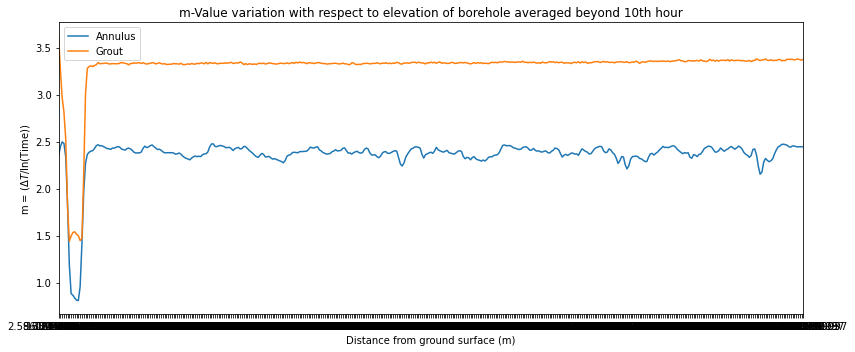

In [64]:
# len(getMMS(all3))
fig = plt.figure(figsize=(12,5))
plt.plot(all3.columns[:-4],getMMS(all3)[:-1],label='Annulus')
plt.plot(all4.columns[:-4],getMMS(all4)[:-1],label='Grout')

plt.ylabel('m = ($\Delta T$/ln(Time))')
plt.xlabel('Distance from ground surface (m)')
plt.title('m-Value variation with respect to elevation of borehole averaged beyond 10th hour')
plt.margins(x=0)
plt.legend()
plt.tight_layout()
plt.savefig('mvar.png',dpi = 250)

In [65]:
all3.shape

(682, 419)

In [66]:
for i in range(419-4):
    all3 = all3[all3['hrs']>10]
    lnr = LinearRegression()
    X = np.log(all3.hrs).values.reshape(-1,1)
    Y = all3[all3.columns[i]].values.reshape(-1,1)
    try:
        print(lnr.fit(X,Y).coef_)
    except:
        continue

[[4.32178209]]
[[3.98828971]]
[[3.57257191]]
[[3.30725079]]
[[3.12363352]]
[[2.46898944]]
[[1.93188897]]
[[1.94584228]]
[[2.06455915]]
[[2.00647995]]
[[1.94863495]]
[[1.9214668]]
[[1.63799679]]
[[1.93793772]]
[[3.1032682]]
[[3.70234587]]
[[3.80010657]]
[[3.81853029]]
[[3.81930241]]
[[3.82348125]]
[[3.85146881]]
[[3.88011641]]
[[3.89553631]]
[[3.86724048]]
[[3.88691242]]
[[3.87034261]]
[[3.87781603]]
[[3.85667935]]
[[3.87033627]]
[[3.8541467]]
[[3.87309948]]
[[3.866443]]
[[3.88641864]]
[[3.88883481]]
[[3.87384467]]
[[3.84754905]]
[[3.8531488]]
[[3.82432806]]
[[3.86079176]]
[[3.85109545]]
[[3.85275133]]
[[3.83886338]]
[[3.82040522]]
[[3.81400681]]
[[3.80661952]]
[[3.81976404]]
[[3.83435931]]
[[3.86221451]]
[[3.87228673]]
[[3.8583646]]
[[3.86736974]]
[[3.87784405]]
[[3.88491331]]
[[3.86828015]]
[[3.85758565]]
[[3.8380175]]
[[3.84197677]]
[[3.83020105]]
[[3.80405189]]
[[3.81033659]]
[[3.82201206]]
[[3.81776474]]
[[3.8098666]]
[[3.80390998]]
[[3.79207126]]
[[3.78716722]]
[[3.79778617]]
[[3.

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


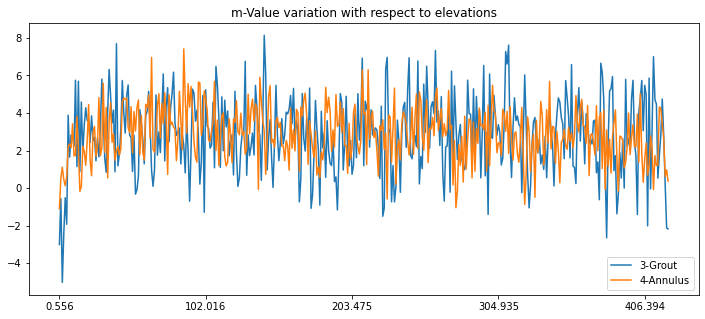

In [67]:
mmf(all3).plot(label='3-Grout',figsize=(12,5))
mmf(all4).plot(label='4-Annulus')
plt.legend()
plt.title('m-Value variation with respect to elevations')
plt.savefig('avem.png')

In [68]:
mmf(all4).mean()

2.863949828063781

In [69]:
all3.columns

Index(['0.556', '1.571', '2.5860000000000003', '3.6', '4.615', '5.629',
       '6.644', '7.659', '8.673', '9.687999999999999',
       ...
       '415.526', '416.54', '417.555', '418.569', '419.584', '420.599',
       '421.61300000000006', '422.62800000000004', 'hrs', 'Hin'],
      dtype='object', length=419)

Now just write a program that takes mi, li ? vT to generate ks.

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


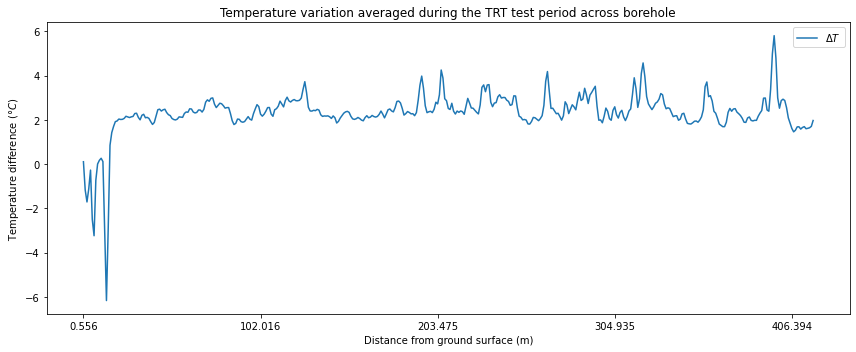

In [70]:
vT.plot(figsize=(12,5),label='$\Delta T$')
plt.xlabel('Distance from ground surface (m)')
plt.ylabel('Temperature difference ($\degree C$)')
plt.legend()
plt.title('Temperature variation averaged during the TRT test period across borehole')
plt.tight_layout()

plt.savefig('delTave.png',dpi = 250)

In [71]:
ta3 = all3.transpose()
ta4 = all4.transpose()
# tt4 = testal4.transpose()

In [72]:
ta3.columns[10],ta3.columns[500],ta4.columns[500]

('2019-09-11 04:22:10', '2019-09-12 15:54:11', '2019-09-12 15:11:10')

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


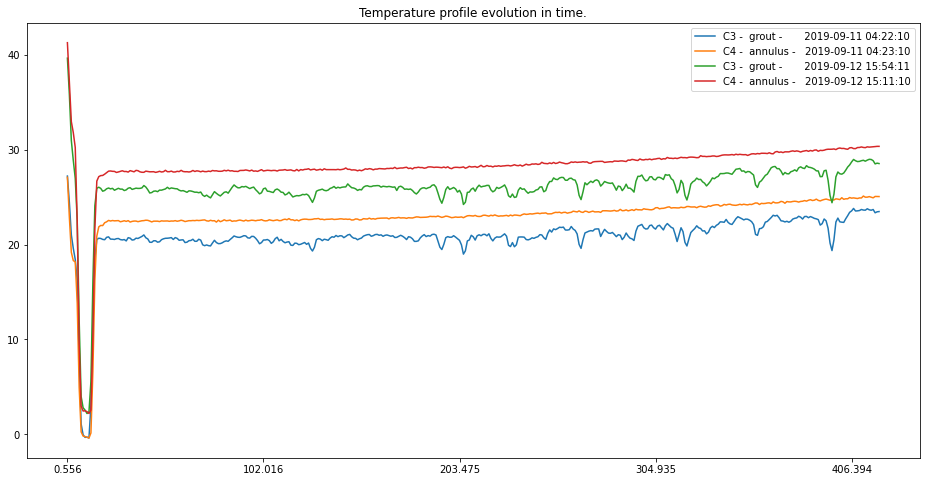

In [73]:
ta3[ta3.columns[10]][:-4].plot(label='C3 -  grout -       '  + str(ta3.columns[10]))
# tt4[tt4.columns[10]][:-4].plot(label='C4 -  grout -   '    + tt4.columns[10])
ta4[ta4.columns[10]][:-4].plot(label='C4 -  annulus -   '    + str(ta4.columns[10]))
ta3[ta3.columns[500]][:-4].plot(label='C3 -  grout -       ' + str(ta3.columns[500]),figsize=(16,8))
# tt4[tt4.columns[650]][:-4].plot(label='C4 -  grout -   '+ tt4.columns[650])
ta4[ta4.columns[500]][:-4].plot(label='C4 -  annulus -   '    + str(ta4.columns[500]))
plt.title('Temperature profile evolution in time.')
plt.legend()
plt.savefig('trt_evol.png',dpi=200)

In [74]:
import testv as tv

In [75]:
tv.cbhe(w=0.00123,kg = 2.77,kep=22.5,deo=0.1651).Rg

0.006696492429662382

In [76]:
import testv as tv
def gks(dt,m,li):
    rb = tv.cbhe(w=0.00123).Rg+0.035 #Rg = 0.015 
    return dt/rb/4/np.pi/m/li

In [77]:
DIS0 = all3.columns.values[:-2].astype(float)

In [78]:
np.mean(gks(vT,mmf(all3),np.append(1e-5,np.diff(all3.columns.values[:-2].astype(float)))))

-37.04637205604615

In [79]:
kss = gks(vT,getMMS(all3)[:-3],np.append(1e-5,np.diff(all3.columns.values[:-2].astype(float)))[:-4])

In [80]:
def gkks(dt,m,li):
    rb = 0.0006*420
    return dt/rb/4/np.pi/m/li
ksss= gkks(vT,getMMS(all3)[:-3],1.015)

In [81]:
kss = kss[kss<15]
kss = kss[kss>-30]

In [82]:
inst = kss.index.values.astype(float)
inst = ['%.3f' % elem for elem in inst]

In [83]:
kss.index = inst

In [84]:
kss = kss/5*4

In [85]:
kss.describe()

count    412.000000
mean       0.897818
std        0.502483
min       -4.785234
25%        0.805795
50%        0.920456
75%        1.054793
max        2.378872
dtype: float64

In [86]:
ksc = pd.DataFrame(columns=['kss','ks','DQ'])

In [87]:
ksc['kss']=kss[:-1]
ksc['ks']=3.219
ksc['vT']= vT

In [88]:
ksc.describe()

,kss,ks,vT
count,411.000000,4.110000e+02,262.000000
mean,0.898146,3.219000e+00,2.306389
std,0.503051,8.892609e-16,0.920133
min,-4.785234,3.219000e+00,-3.236008
25%,0.806479,3.219000e+00,2.066994
50%,0.920940,3.219000e+00,2.368552
75%,1.055015,3.219000e+00,2.686946
max,2.378872,3.219000e+00,4.572931


In [89]:
ksc['QT'] = ksc['vT']*4.18e3*0.00123*ksc['kss']

In [90]:
vT.values[1:]*4.18e3*0.00123*kss[:]

1.571       2.650994
2.586       6.323188
3.600       2.922090
4.615       0.181026
5.629      19.626666
             ...    
414.511     5.088030
415.526     5.193172
416.540     5.370267
417.555     5.793527
418.569     7.735971
Length: 412, dtype: float64

In [91]:
ksc.describe()

,kss,ks,vT,QT
count,411.000000,4.110000e+02,262.000000,262.000000
mean,0.898146,3.219000e+00,2.306389,12.721264
std,0.503051,8.892609e-16,0.920133,6.490049
min,-4.785234,3.219000e+00,-3.236008,0.000147
25%,0.806479,3.219000e+00,2.066994,8.689723
50%,0.920940,3.219000e+00,2.368552,11.502994
75%,1.055015,3.219000e+00,2.686946,15.055140
max,2.378872,3.219000e+00,4.572931,44.538101


In [92]:
kss.describe()

count    412.000000
mean       0.897818
std        0.502483
min       -4.785234
25%        0.805795
50%        0.920456
75%        1.054793
max        2.378872
dtype: float64

In [93]:
kk = kss[kss>0][1:]

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

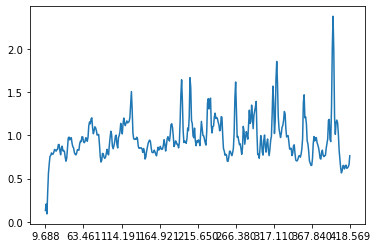

In [94]:
kk.plot()

In [95]:
kk.describe()

count    401.000000
mean       0.960856
std        0.239125
min        0.090447
25%        0.816556
50%        0.928037
75%        1.069660
max        2.378872
dtype: float64

In [96]:
vT.index

Index(['0.556', '1.571', '2.5860000000000003', '3.6', '4.615', '5.629',
       '6.644', '7.659', '8.673', '9.687999999999999',
       ...
       '409.43800000000005', '410.45300000000003', '411.467',
       '412.48199999999997', '413.496', '414.51099999999997', '415.526',
       '416.54', '417.555', '418.569'],
      dtype='object', length=413)

In [97]:
kss[kss>0][1:].mean()#vs ks=3.2

0.9608555031273163

In [98]:
targ= kss[kss>0][1:]
targ= targ/targ.mean()*3.21

In [99]:
#Assumption: It takes $20/ft to reach 3.2 W/m K thermal conductivity. So whatever's more equals extra drilling benefits.

In [100]:
tarr=(targ-3.21)/3.21*20

In [101]:
df = pd.DataFrame(columns=['ksm','ksv'])

In [102]:
df['ksv']=tarr
df['ksm']=3.21

In [103]:
df['ksm']=(df['ksm']-3.21)/3.21*20

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

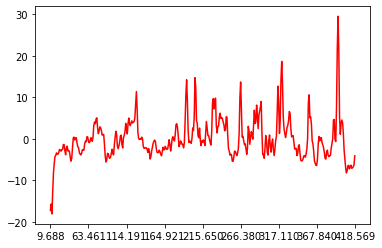

In [104]:
df['ksv'].plot(kind='line',color=(df['ksv'] > 0).map({True: 'g',False: 'r'}))

In [105]:
df['positive']=df['ksv']>0

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

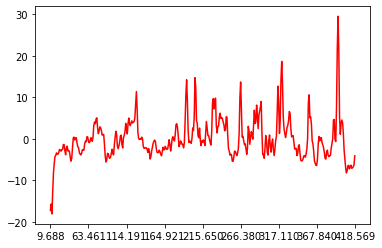

In [106]:
df['ksv'].plot(kind='line',color=df.positive.map({True: 'g', False: 'r'}))

In [107]:
df['ksv']

9.688     -17.307509
10.702    -15.739286
11.717    -18.117358
15.775    -12.781350
16.790     -8.241715
             ...    
414.511    -7.128897
415.526    -7.010335
416.540    -6.769557
417.555    -6.262419
418.569    -4.114212
Name: ksv, Length: 401, dtype: float64

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


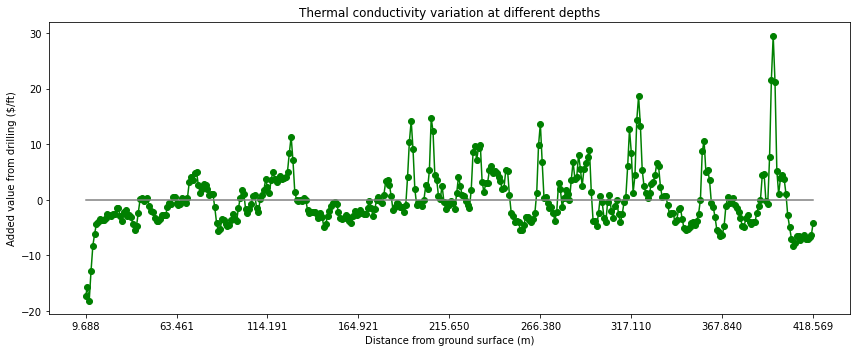

In [108]:
df['ksv'].plot(figsize=(12,5),label='$k_s$',color='g',marker='o')
df['ksm'].plot(color='grey')
plt.xlabel('Distance from ground surface (m)')
plt.ylabel('Added value from drilling ($/ft)')
plt.title('Thermal conductivity variation at different depths')
plt.tight_layout()
plt.savefig('dolks.png',dpi = 250)

In [109]:
DF = df.copy()

In [110]:
df = DF.iloc[:-14]

In [111]:
inst = df.index.values.astype(float)
inst = ['%.3f' % elem for elem in inst]
ins = np.array(inst).astype(float)
inss=(ins*3.28084).astype(int)
df = df.set_index(inss)

In [112]:
df[df.index>1100]

,ksm,ksv,positive
1103,0.0,0.736602,True
1106,0.0,-0.977509,False
1110,0.0,-2.505477,False
1113,0.0,-2.354791,False
1116,0.0,-2.319519,False
...,...,...,...
1313,0.0,3.831731,True
1316,0.0,4.498677,True
1320,0.0,3.816426,True
1323,0.0,1.129346,True


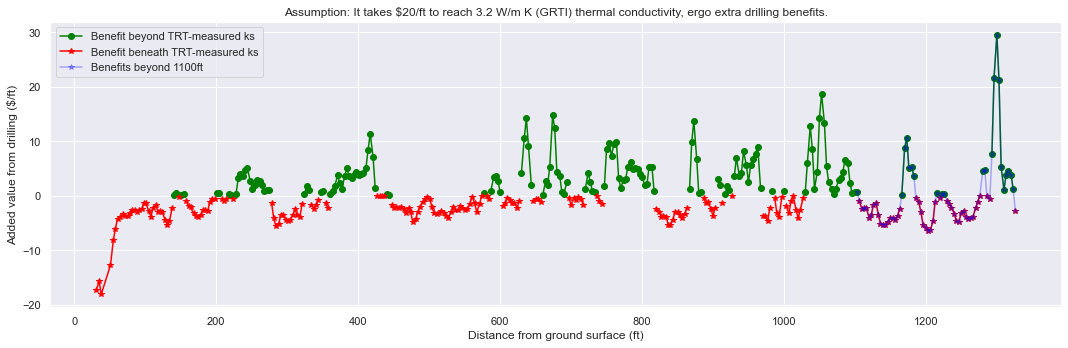

In [113]:
import seaborn as sns

sns.set(rc={"figure.figsize": (15, 5)})
df.ksv.where(df.ksv.ge(0),np.nan).plot(color='green',marker='o',label='Benefit beyond TRT-measured ks')
df.ksv.where(df.ksv.lt(0),np.nan).plot(color='red',marker='*',label='Benefit beneath TRT-measured ks')
df[df.index > 1100].ksv.plot(color='blue',marker = '*',alpha=0.3,label='Benefits beyond 1100ft')
plt.xlabel('Distance from ground surface (ft)')
plt.ylabel('Added value from drilling ($/ft)')
plt.legend()
plt.title('Assumption: It takes $20/ft to reach 3.2 W/m K (GRTI) thermal conductivity, ergo extra drilling benefits.')
plt.tight_layout()
plt.savefig('dolks.png',dpi = 250)

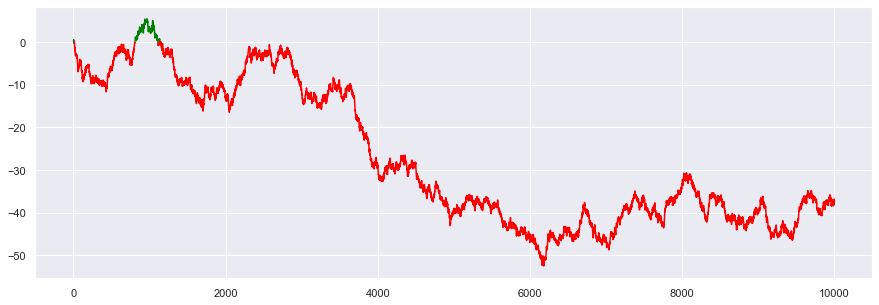

In [114]:
df = pd.DataFrame(np.cumsum(np.random.rand(10000)-0.5), columns=['cum_profit'])
df.cum_profit.where(df.cum_profit.ge(0), np.nan).plot(color='green')
df.cum_profit.where(df.cum_profit.lt(0), np.nan).plot(color='red')
plt.show()

In [115]:
kms = kss*4

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

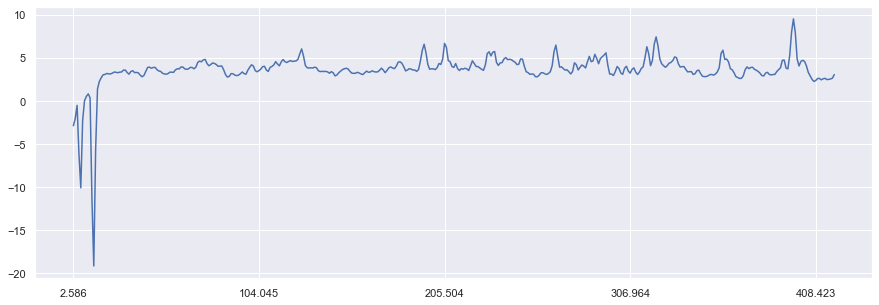

In [116]:
kms[1:].plot()

In [117]:
ks = pd.DataFrame(columns=['ksmm','ksv'])
ks['ksv']=kms
ks['ksmm']=3.21
inst = ks.index.values.astype(float)
inst = ['%.3f' % elem for elem in inst]
ins = np.array(inst).astype(float)
inss=(ins*3.28084).astype(int)
ks = ks.set_index(inss)

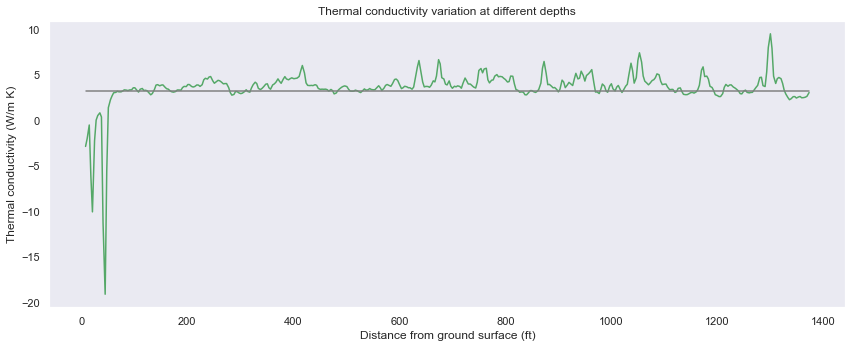

In [118]:
ks['ksv'][1:].plot(figsize=(12,5),label='$k_s$',color='g')
ks['ksmm'][1:].plot(label='$k_s$ (GRTI)',color='grey')

plt.xlabel('Distance from ground surface (ft)')
plt.ylabel('Thermal conductivity (W/m K)')
plt.title('Thermal conductivity variation at different depths')
plt.tight_layout()
plt.grid(False)
plt.savefig('ks.png',dpi = 250)

In [119]:
kss.describe()

count    412.000000
mean       0.897818
std        0.502483
min       -4.785234
25%        0.805795
50%        0.920456
75%        1.054793
max        2.378872
dtype: float64

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

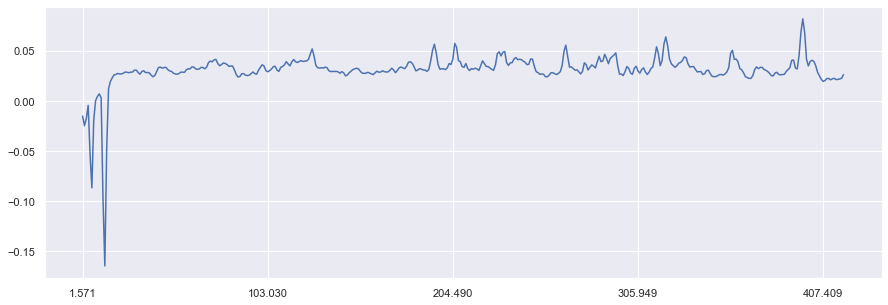

In [120]:
alss = kss/2.515e6*24*3600
alss.plot()

In [121]:
len(kss)

412

In [122]:
len(getMMS(all3)[:-1])

415

In [123]:
qss = (kss*4*np.pi*getMMS(all3)[:-4])*1.015

In [124]:
qss.mean()

44.49298573597013

In [125]:
qss.mean()/3.375

13.18310688473189

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


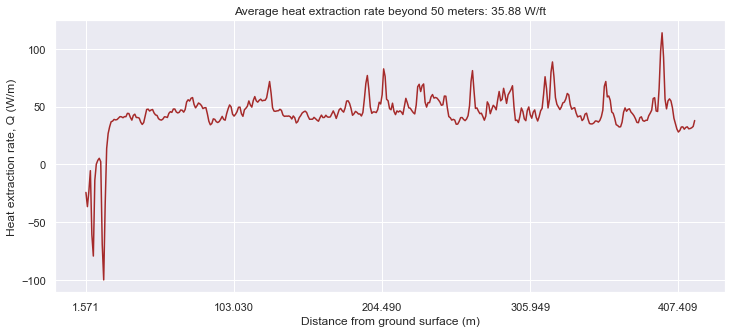

In [126]:
qss.plot(figsize=(12,5),color='brown')
plt.xlabel('Distance from ground surface (m)')
plt.ylabel('Heat extraction rate, Q (W/m)')
plt.title('Average heat extraction rate beyond 50 meters: 35.88 W/ft')
plt.savefig('qss.png',dpi=250)

In [127]:
qss.sum()/1340

13.67993292777589

In [128]:
alss.mean()

0.030843530722831296

In [129]:
kss.mean()

0.8978180528694526

In [130]:
len(kss)

412

In [131]:
np.mean(all3.mean() - all4.mean())

-2.2549506424671266

In [132]:
gks(-2.18,3.28,420.8)*420.8

-1.2684497373051884

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

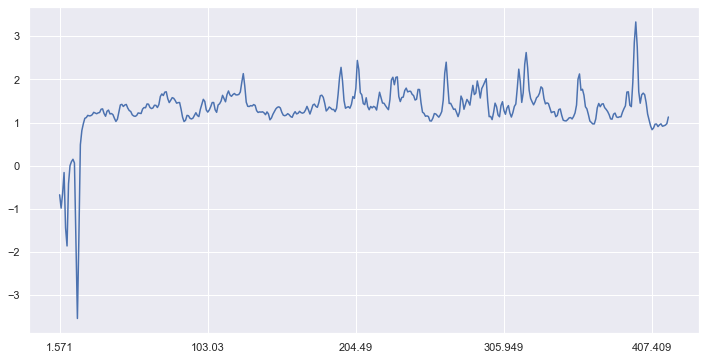

In [133]:
gks(vT,3.28,np.append(1e-5,np.diff(all3.columns.values[:-2].astype(float)))[:-4])[1:].plot(figsize=(12,6))

In [134]:
ks_s = gks(vT,3.28,np.append(1e-5,np.diff(all3.columns.values[:-2].astype(float)))[:-4])[1:]

In [135]:
ist = ks_s.index.values.astype(float)
ist = ['%.3f' % elem for elem in ist]
ks_s.index = ist

/Users/tajjahnae/miniconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

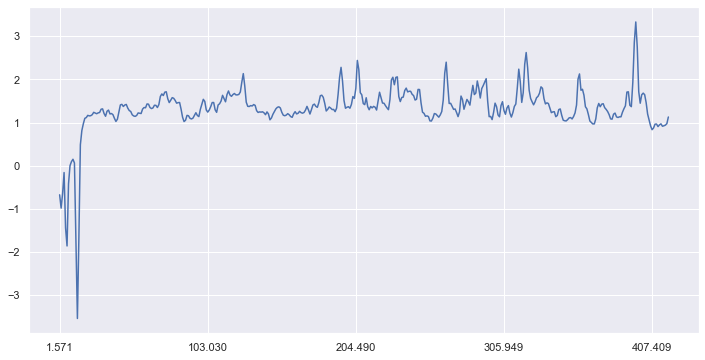

In [136]:
ks_s.plot(figsize=(12,6))

In [137]:
alss = kss/2.515e6

In [138]:
alss.mean()

3.5698530929202885e-07

In [139]:
kss.sum()

369.9010377822145

In [140]:
mmf(al3_10).mean()

2.815600555914805

In [141]:
mmf(al4_10).mean()

2.863949828063781

In [142]:
tar = al3_10.transpose() #al3_10inhr

In [143]:
tar.columns

Index(['2019-09-11 03:42:10', '2019-09-11 03:46:11', '2019-09-11 03:50:11',
       '2019-09-11 03:54:11', '2019-09-11 03:58:10', '2019-09-11 04:02:11',
       '2019-09-11 04:06:11', '2019-09-11 04:10:11', '2019-09-11 04:14:11',
       '2019-09-11 04:18:11',
       ...
       '2019-09-12 17:50:11', '2019-09-12 17:54:10', '2019-09-12 18:01:03',
       '2019-09-12 18:02:04', '2019-09-12 18:03:04', '2019-09-12 18:04:04',
       '2019-09-12 18:05:04', '2019-09-12 18:06:04', '2019-09-12 18:07:04',
       '2019-09-12 18:09:04'],
      dtype='object', name='DT', length=532)

In [144]:
tar.index.values[:-2].astype(float)

array([  0.556,   1.571,   2.586,   3.6  ,   4.615,   5.629,   6.644,
         7.659,   8.673,   9.688,  10.702,  11.717,  12.731,  13.746,
        14.761,  15.775,  16.79 ,  17.804,  18.819,  19.834,  20.848,
        21.863,  22.877,  23.892,  24.907,  25.921,  26.936,  27.95 ,
        28.965,  29.98 ,  30.994,  32.009,  33.023,  34.038,  35.053,
        36.067,  37.082,  38.096,  39.111,  40.126,  41.14 ,  42.155,
        43.169,  44.184,  45.199,  46.213,  47.228,  48.242,  49.257,
        50.271,  51.286,  52.301,  53.315,  54.33 ,  55.344,  56.359,
        57.374,  58.388,  59.403,  60.417,  61.432,  62.447,  63.461,
        64.476,  65.49 ,  66.505,  67.52 ,  68.534,  69.549,  70.563,
        71.578,  72.593,  73.607,  74.622,  75.636,  76.651,  77.666,
        78.68 ,  79.695,  80.709,  81.724,  82.739,  83.753,  84.768,
        85.782,  86.797,  87.812,  88.826,  89.841,  90.855,  91.87 ,
        92.884,  93.899,  94.914,  95.928,  96.943,  97.957,  98.972,
        99.987, 101.

In [145]:
tar.head(5)

DT,2019-09-11 03:42:10,2019-09-11 03:46:11,2019-09-11 03:50:11,2019-09-11 03:54:11,2019-09-11 03:58:10,2019-09-11 04:02:11,2019-09-11 04:06:11,2019-09-11 04:10:11,2019-09-11 04:14:11,2019-09-11 04:18:11,...,2019-09-12 17:50:11,2019-09-12 17:54:10,2019-09-12 18:01:03,2019-09-12 18:02:04,2019-09-12 18:03:04,2019-09-12 18:04:04,2019-09-12 18:05:04,2019-09-12 18:06:04,2019-09-12 18:07:04,2019-09-12 18:09:04
0.556,27.206,27.145,27.162,27.145,27.160,27.252,27.235,27.038,27.244,27.231,...,34.973,34.725,34.973,34.738,34.605,34.748,34.766,34.487,34.424,34.717
1.571,24.361,24.441,24.368,24.276,24.361,24.446,24.363,24.294,24.323,24.288,...,31.581,31.476,31.253,31.793,31.235,31.462,31.586,31.400,31.146,31.315
2.5860000000000003,21.131,21.191,21.047,21.124,21.131,21.160,21.027,21.062,21.110,20.960,...,27.735,27.608,27.601,27.429,27.412,27.454,27.769,27.705,27.242,27.672
3.6,19.846,19.629,19.562,19.678,19.638,19.686,19.601,19.561,19.622,19.633,...,25.729,25.705,25.803,25.675,25.596,25.510,26.049,25.788,25.832,25.646
4.615,18.589,18.684,18.592,18.580,18.484,18.570,18.398,18.510,18.634,18.535,...,24.272,24.268,24.159,24.347,24.084,24.123,24.395,24.499,24.305,24.288


In [146]:
al3_10.describe()

,0.556,1.571,2.5860000000000003,3.6,4.615,5.629,6.644,7.659,8.673,9.687999999999999,...,415.526,416.54,417.555,418.569,419.584,420.599,421.61300000000006,422.62800000000004,hrs,Hin
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,529.000000
mean,35.529820,32.729242,29.263821,27.553252,25.961553,21.839417,11.155923,2.782534,1.569558,1.345789,...,26.986568,26.956840,26.896453,26.633226,26.572910,26.658966,114.895801,99.008895,28.877921,77.841009
std,4.554787,4.528827,4.286747,4.080359,3.806924,2.909424,1.533890,0.924314,0.946393,0.921982,...,1.734333,1.729839,1.729447,1.729293,1.721374,1.728659,24.041966,21.244364,11.085419,0.121268
min,26.858000,23.982000,20.743000,19.248000,18.154000,16.048000,8.004000,0.938000,-0.245000,-0.362000,...,23.418000,23.368000,23.351000,23.022000,23.033000,23.076000,82.851000,70.174000,10.036111,77.659232
25%,32.629750,29.839750,26.745250,25.304750,23.897750,20.244250,10.125250,1.954500,0.498750,0.274000,...,25.251500,25.233000,25.193000,24.922500,24.839750,24.965000,96.615500,83.090750,19.153056,77.759186
50%,35.007500,32.024000,28.623000,26.880000,25.400000,21.645500,11.297500,2.968500,1.823000,1.634000,...,27.827000,27.760500,27.760500,27.473000,27.360000,27.484500,108.859000,93.775000,29.003056,77.816027
75%,39.893500,37.068750,33.134000,31.209000,29.218000,24.129250,12.253250,3.383750,2.294000,2.063500,...,28.336250,28.272250,28.231750,27.969000,27.904500,27.990250,113.058500,97.402250,37.852986,77.869743
max,43.426000,40.797000,36.975000,34.957000,32.705000,27.166000,13.911000,5.714000,4.093000,3.876000,...,29.788000,29.724000,29.875000,29.586000,29.365000,29.429000,161.810000,140.644000,48.484444,78.138135


In [168]:
def mfbh10(df):
    dfinhr = df.set_index('hrs')
    dfT = dfinhr.transpose()
    dft = dfT.drop('Hin')
    mean1=dft.transpose()
    # print(dfinhr.describe())
    # print(dfT.describe())
    # print(dft.describe())
   # print(mean1.describe())
   # print(len(np.log(dft.index.values.astype(float))))
#     dft['hr'] = dft.index.values.astype(float)
    print(np.gradient(mean1.mean(),np.log(dft.index.values.astype(float))))
    return dft

In [169]:
warrant = mfbh10(al3_10).index.values

[-2.69623456e+00 -5.57281922e+00 -5.88177629e+00 -5.87761018e+00
 -1.43795728e+01 -4.45668656e+01 -6.14579233e+01 -3.26827261e+01
 -5.66408852e+00 -1.72337615e+00 -6.47834691e-01  2.26284469e+01
  9.00802674e+01  1.19033783e+02  6.16460966e+01  1.12882900e+01
 -1.21081333e-01 -3.08005349e+00 -7.07759835e-01  2.03028608e+00
  1.75958602e+00  6.04920500e-01 -4.66812947e-01 -1.60953570e+00
 -6.65395291e-01  7.27817127e-01 -8.90665877e-02 -6.18726383e-01
 -2.09420260e+00 -1.95926081e+00  2.68620571e+00  4.51410827e+00
 -1.73927435e+00 -4.09465941e+00  2.12420730e+00  2.43724007e+00
  5.89995659e-01  3.50917155e+00  5.03362867e+00  6.60047786e-01
 -7.62305873e+00 -1.22549803e+01 -6.69111261e+00  1.46124464e+00
 -8.81820103e-02 -2.40079870e+00  3.53782803e+00  6.51081417e+00
  3.57175397e+00  4.21213298e+00  4.08734424e+00  1.28721459e+00
 -7.20655462e-01 -3.57408801e+00 -1.90491276e+00  9.96555062e-01
 -4.44109779e+00 -6.58910814e+00 -1.42527294e+00 -4.46455640e+00
 -4.38596261e+00  4.53540

In [170]:
np.array(map(float,warrant))

array(<map object at 0x139437190>, dtype=object)

In [171]:
Guograd1 = np.gradient(al3_10)

In [177]:
df = pd.read_csv(f23[0],header=25,sep='\t',encoding= 'unicode_escape')
df.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)

In [178]:
DF = df[df['depth']>0]
DF = DF.set_index('depth')
DF = DF.transpose()

In [179]:
DF.append(DF.loc['tempc'])

depth,0.556,1.571,2.586,3.600,4.615,5.629,6.644,7.659,8.673,9.688,...,413.496,414.511,415.526,416.540,417.555,418.569,419.584,420.599,421.613,422.628
tempc,35.028,31.922,27.816,25.583,23.846,20.057,9.562,1.082,-0.043,-0.307,...,18.426,18.397,18.213,18.340,18.194,17.978,18.067,18.243,150.779,130.645
stokes,1511.683,1482.592,1417.013,1330.393,1282.809,1224.095,1132.814,1086.536,1080.632,1077.299,...,798.622,798.540,798.468,797.638,797.397,796.318,795.635,795.057,1355.958,1437.682
nonstokes,1326.245,1279.463,1195.928,1108.970,1058.872,988.736,859.212,780.507,770.431,766.641,...,616.650,616.426,615.654,615.416,614.651,612.991,612.728,612.861,1779.870,1779.996
tempc,35.028,31.922,27.816,25.583,23.846,20.057,9.562,1.082,-0.043,-0.307,...,18.426,18.397,18.213,18.340,18.194,17.978,18.067,18.243,150.779,130.645


In [182]:
f24 = fl[3]
all4 = pd.DataFrame(index=pd.read_csv(f24[1],header=25,sep='\t',encoding= 'unicode_escape')['length (m)'].values)

for i in range(len(f24)):
    fram = pd.read_csv(f24[i],header=25,sep='\t',encoding= 'unicode_escape')
    fram.set_axis(['depth','tempc','stokes','nonstokes'],axis=1,inplace=True)
    all4[str(f24[i])[-25:-25+8]+str(f24[i])[-25+9:-25+15]]=fram.tempc.values

In [188]:
print(all3.describe())
print(all3.index.values)
C3 = all3[all3.index.values > 0]
C4 = all4[all4.index.values > 0]

            0.556       1.571  2.5860000000000003         3.6       4.615  \
count  532.000000  532.000000          532.000000  532.000000  532.000000   
mean    35.529820   32.729242           29.263821   27.553252   25.961553   
std      4.554787    4.528827            4.286747    4.080359    3.806924   
min     26.858000   23.982000           20.743000   19.248000   18.154000   
25%     32.629750   29.839750           26.745250   25.304750   23.897750   
50%     35.007500   32.024000           28.623000   26.880000   25.400000   
75%     39.893500   37.068750           33.134000   31.209000   29.218000   
max     43.426000   40.797000           36.975000   34.957000   32.705000   

            5.629       6.644       7.659       8.673  9.687999999999999  ...  \
count  532.000000  532.000000  532.000000  532.000000         532.000000  ...   
mean    21.839417   11.155923    2.782534    1.569558           1.345789  ...   
std      2.909424    1.533890    0.924314    0.946393          

TypeError: '>' not supported between instances of 'str' and 'int'

ins = C3.index.to_list()
import pickle
with open('ins','wb') as f:
    pickle.dump(ins,f)

In [ ]:
C3.index.values.to_csv('Depthprof.csv')

In [ ]:
C3.columns[0]

In [ ]:
C4.columns[0]

In [ ]:
s1[7:16]

In [ ]:
M = fl[0]

In [ ]:
import bisect
M[bisect.bisect_left(M, 'pt0919/channel 1/2019/sep/channel 1 20190910 155211 00001.ddf')]

In [ ]:
all3.head()

In [ ]:
taa3 = all3.transpose().iloc[:-4]
taa4 = all4.transpose().iloc[:-4]

In [ ]:
all3.transpose().tail(5)

In [ ]:
taa3[taa3.columns[0]].plot(label='In-pipe, '+taa3.columns[0],figsize=(13,5))
taa4[taa4.columns[0]].plot(label='Grout,   '+taa4.columns[0])

plt.legend()

In [ ]:
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots(figsize=(13,5))
ax.set(xlim=(0.556,407),ylim=(0,35))
x = np.linspace(0.556,407,91)
y = np.linspace(0,35,30)
X,Y = np.meshgrid(x,y)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
graph, = ax.plot([],[], 'o')

im = ax.imshow(taa3[0],interpolation='nearest')

def getdata(i):
    return taa3[taa3.columns[i]].values
y = taa3.index.values

def update(i):
    x = getdata(i)
    graph.set_data(x,y)
    return graph,

ani = animation.FuncAnimation(fig, update,  
                              frames=pd.Index.intersection(df_x.index,df_y.index),
                              interval=500, blit=False)
plt.show()

In [ ]:
import matplotlib.lines as mlines
import matplotlib.animation as anim
# time = df.monat.unique()    
fig = plt.figure()
i = 1
yv=taa3.index.values
def update(i):
    plt.clf()
#     dft = df[(df.monat == time[i]) & (df.xcol < 4000)]
    plt.plot(yv,taa3[taa3.columns[i]],label='taa3.columns[i]')
    plt.plot(yv,taa4[taa4.columns[i]],label='taa4.columns[i]')
    #plt.title,xlabel,ylabel,xlim,ylim,legend
    i+=1
ani = anim.FuncAnimation(fig, update, frames=len(yv), interval=500)


In [ ]:
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

In [ ]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation

yv = taa3.index.values
def update_line(num, line):
#     line.set_data(data[..., :num])
    line.set_data(yv,taa3[taa3.columns[num]])
    return line,

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)

In [ ]:
fig, ax = plt.subplots()

x = np.array(taa3.index.values)
# line, = ax.plot(x, np.sin(x))
line, = ax.plot(x,taa3[taa3.columns[0]])

def animate(i):
    line.set_ydata(taa3[taa3.columns[i]])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(taa3[taa3.columns[0]])
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
ani.save('anitest.mp4')
plt.show()

In [ ]:
ani

In [ ]:
type(np.array(taa3[taa3.columns[0]].values))

In [ ]:
taa3[taa3.columns[0]].plot(label='In-pipe, '+taa3.columns[0],figsize=(13,5))
taa4[taa4.columns[0]].plot(label='Grout,   '+taa4.columns[0])

plt.legend()